In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

# Selecting the required columns
data = data[['Latitude', 'Longitude', 'MedInc']]

# Split the data into train and test sets
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)


/tmp/ipykernel_1598/4125813509.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data.info()
data.describe()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


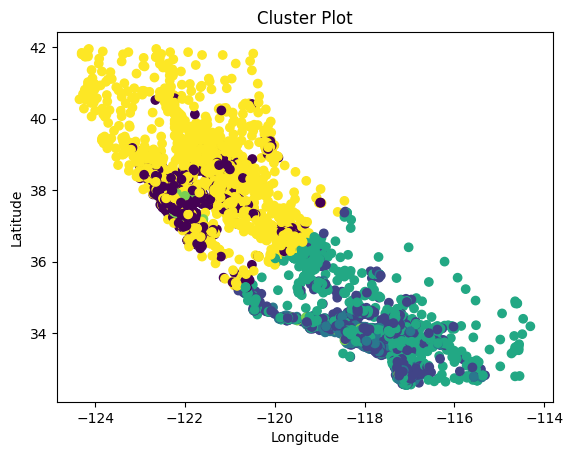

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
train_set['cluster'] = kmeans.fit_predict(train_set)

# Plotting the clusters
plt.scatter(train_set['Longitude'], train_set['Latitude'], c=train_set['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Plot')
plt.show()

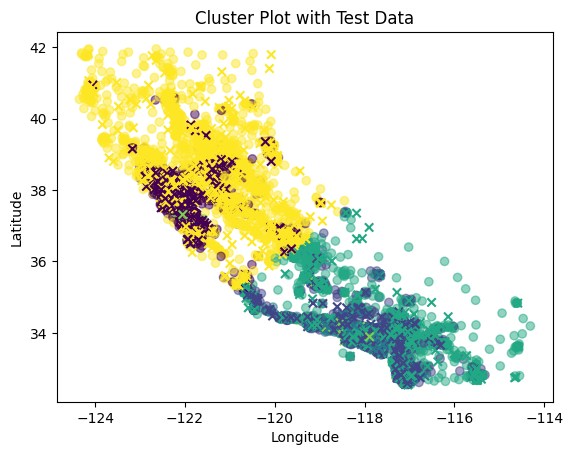

In [4]:
# Predicting clusters for the test set
test_set['cluster'] = kmeans.predict(test_set)

# Plotting the clusters with test data
plt.scatter(train_set['Longitude'], train_set['Latitude'], c=train_set['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(test_set['Longitude'], test_set['Latitude'], c=test_set['cluster'], cmap='viridis', marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Plot with Test Data')
plt.show()


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preparing the data for supervised learning
X_train = train_set.drop('cluster', axis=1)
y_train = train_set['cluster']
X_test = test_set.drop('cluster', axis=1)
y_test = test_set['cluster']

# Training a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.2f}")


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128

Accuracy: 1.00


In [7]:
import pickle

# Save the trained model to a file
with open('KMeans_trained_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("Model saved successfully.")


Model saved successfully.
